In [1]:
from pycaret.datasets import get_data
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = get_data('titanic')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [4]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S


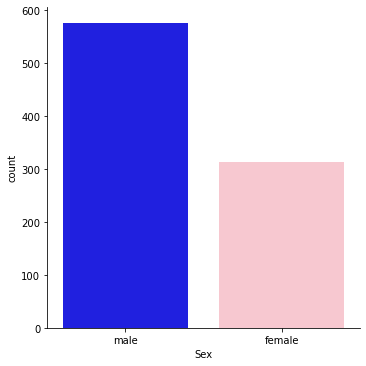

In [5]:
sns.catplot(x='Sex',kind='count',data=df,palette = ['blue','pink'])

In [6]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [7]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S


<AxesSubplot:xlabel='Embarked', ylabel='count'>

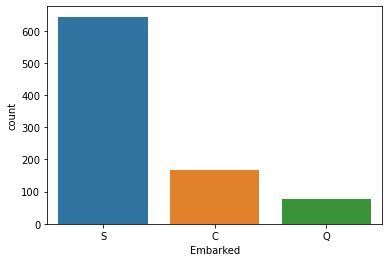

In [8]:
sns.countplot(data=df,x='Embarked')

In [9]:
df.Embarked = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [10]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0


In [11]:
#df =  pd.get_dummies(df,columns=['Cabin'])

In [12]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0


In [13]:
df = df.dropna()

In [14]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0


In [15]:
df.shape

(712, 8)

In [16]:
X = df.drop('Survived',axis = 1)
Y = df['Survived']

In [ ]:
#def plot_classification_results(clf, X, y, title):
    from matplotlib.colors import ListedColormap
    # Divide o dataset em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Fit dos dados com o classificador
    clf.fit(X_train, y_train)

    # Cores para o gráfico
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = .02  # step size in the mesh
    
    # Plot da fronteira de decisão.
    # Usando o meshgrid do NumPy e atribuindo uma cor para cada ponto 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Previsões
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Resultados em cada cor do plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot dos pontos de dados de treino
    pl.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cmap_bold)

    y_predicted = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    pl.scatter(X_test[:, 0], X_test[:, 1], c = y_predicted, alpha = 0.5, cmap = cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title(title)
    return score

In [82]:
#clf = DecisionTreeClassifier()

In [83]:
#plot_classification_results(clf,X,Y,'Oi')

In [17]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,2.0
886,2,0,27.0,0,0,13.0000,0.0
887,1,1,19.0,0,0,30.0000,0.0
889,1,0,26.0,0,0,30.0000,1.0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 3)

# SVM

In [19]:
model = svm.SVC(C=1.0)

In [20]:
modeltree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [21]:
model.fit(x_train,y_train)

SVC()

# DT

In [22]:
modeltree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
310,1,1,24.0,0,0,83.1583,1.0
866,2,1,27.0,1,0,13.8583,1.0
105,3,0,28.0,0,0,7.8958,0.0
401,3,0,26.0,0,0,8.0500,0.0
221,2,0,27.0,0,0,13.0000,0.0
...,...,...,...,...,...,...,...
69,3,0,26.0,2,0,8.6625,0.0
54,1,0,65.0,0,1,61.9792,1.0
542,3,1,11.0,4,2,31.2750,0.0
541,3,1,9.0,4,2,31.2750,0.0


In [24]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
y_test

310    1
866    1
105    0
401    0
221    0
      ..
69     0
54     0
542    0
541    0
402    0
Name: Survived, Length: 214, dtype: int64

In [26]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,2.0
886,2,0,27.0,0,0,13.0000,0.0
887,1,1,19.0,0,0,30.0000,0.0
889,1,0,26.0,0,0,30.0000,1.0


# Results

In [27]:
print(str(round(model.score(x_test,y_test)*100,2))+'% SVM')

67.76% SVM


<AxesSubplot:ylabel='count'>

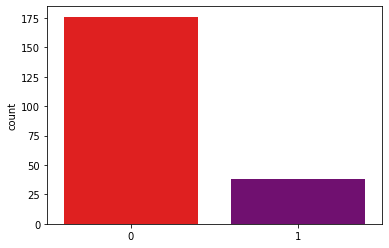

In [28]:
sns.countplot(x=model.predict(x_test),palette = ['red','purple'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

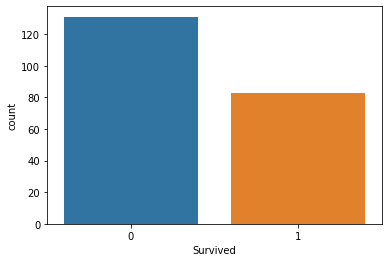

In [29]:
sns.countplot(x=y_test)

In [30]:
modeltree.predict(x_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
print(str(round(modeltree.score(x_test,y_test)*100,2))+'% Decision Tree')

79.44% Decision Tree


# FEATURE SELECTION

In [32]:
from sklearn.feature_selection import RFE
rfe = RFE(modeltree,step = 3)
fit = rfe.fit(X,Y)

In [33]:
fit.ranking_

array([1, 1, 1, 2, 3, 3, 3])

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k = 7)
fit = test.fit(X,Y)


In [35]:
fit.scores_

array([2.82432132e+01, 1.30515207e+02, 3.42460978e+01, 2.88690988e-01,
       1.08834998e+01, 4.08167942e+03, 8.71847174e+00])

In [36]:
modeltree.feature_importances_

array([0.22763367, 0.50911561, 0.09609887, 0.04780267, 0.        ,
       0.11934918, 0.        ])

# Mudança de escala

In [37]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,2.0
886,2,0,27.0,0,0,13.0000,0.0
887,1,1,19.0,0,0,30.0000,0.0
889,1,0,26.0,0,0,30.0000,1.0


In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

In [50]:
modelo_escala = linear_model.LogisticRegression(max_iter=200)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 3)

In [52]:
modelo_escala.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [53]:
modelo_escala.score(x_test,y_test)

0.7990654205607477

In [54]:
# Modelo Com Escala

In [55]:
modelo_escala2 = linear_model.LogisticRegression()

In [56]:
scaler = MinMaxScaler(feature_range = (0,1))
dados_normalizados = scaler.fit_transform(X)

In [46]:
dados_normalizados

array([[1.        , 0.        , 0.27117366, ..., 0.        , 0.01415106,
        0.        ],
       [0.        , 1.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.5       ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.01546857,
        0.        ],
       ...,
       [0.        , 1.        , 0.23347575, ..., 0.        , 0.0585561 ,
        0.        ],
       [0.        , 0.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.5       ],
       [1.        , 0.        , 0.39683338, ..., 0.        , 0.01512699,
        1.        ]])

In [47]:
x_train, x_test, y_train, y_test = train_test_split(dados_normalizados,Y, test_size = 0.3, random_state = 3)

In [48]:
modelo_escala2.fit(x_train,y_train)

LogisticRegression()

In [49]:
modelo_escala2.score(x_test,y_test)

0.7897196261682243

## padronização

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
modelo_standard = linear_model.LogisticRegression()

In [52]:
standard = StandardScaler()
standard_fit = standard.fit(X)
x_padronizado = standard_fit.transform(X)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_padronizado,Y, test_size = 0.3, random_state = 3)

In [54]:
modelo_standard.fit(x_train,y_train)

LogisticRegression()

In [55]:
modelo_standard.score(x_test,y_test)

0.7897196261682243

## PCA

In [131]:
modelo_PCA = linear_model.LogisticRegression()

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [133]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,2.0
886,2,0,27.0,0,0,13.0000,0.0
887,1,1,19.0,0,0,30.0000,0.0
889,1,0,26.0,0,0,30.0000,1.0


In [134]:
escalando_para_pca = MinMaxScaler(feature_range=(0,1))
fit_x = escalando_para_pca.fit_transform(X)

In [140]:
pca = PCA(n_components = 3)
fit = pca.fit(X)
X = fit.transform(X)

In [141]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 3)

In [142]:
modelo_PCA.fit(x_train,y_train)

LogisticRegression()

In [143]:
modelo_PCA.score(x_test,y_test)

0.7149532710280374

In [56]:
!pip install graphviz

  Using cached graphviz-0.17-py3-none-any.whl (18 kB)


In [57]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

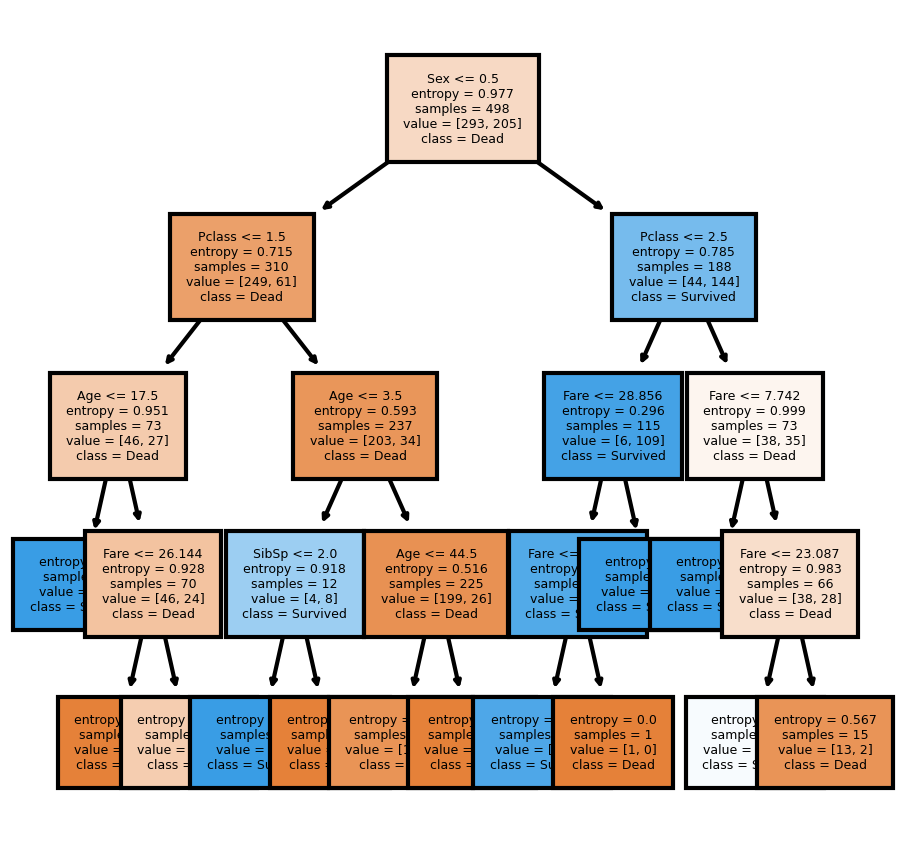

In [58]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3.5,3.5), dpi=300)
tree.plot_tree(modeltree, 
               fontsize=3,
              feature_names=X.columns,
              class_names=['Dead','Survived'],
              filled=True);

<AxesSubplot:ylabel='count'>

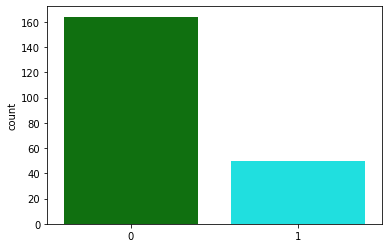

In [138]:
sns.countplot(x=modeltree.predict(x_test),palette=['green','cyan'])

<AxesSubplot:ylabel='count'>

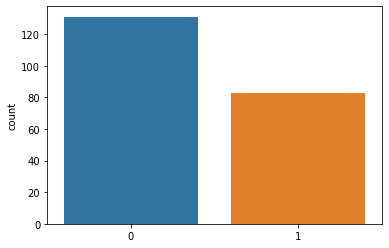

In [139]:
sns.countplot(x=y_test)

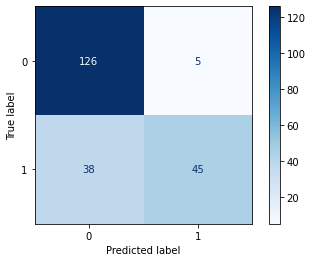

In [140]:
plot_confusion_matrix(modeltree,x_test,y_test,cmap='Blues')